In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = pd.read_csv("Temperatures of India.csv")

In [4]:
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [5]:
month_cols = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

In [6]:
month_avg = data[month_cols].mean()

In [7]:
month_avg

JAN    23.687436
FEB    25.597863
MAR    29.085983
APR    31.975812
MAY    33.565299
JUN    32.774274
JUL    31.035897
AUG    30.507692
SEP    30.486752
OCT    29.766581
NOV    27.285470
DEC    24.608291
dtype: float64

In [8]:
month_df = pd.DataFrame({
    'Month_Num': range(1, 13),
    'AvgTemperature': month_avg.values
})

In [ ]:
X_ = month_df[['Month_Num']]      
y = month_df['AvgTemperature'] 
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

In [ ]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [11]:
y_pred = model.predict(X)

In [12]:
print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))

MSE: 9.539940685002199
MAE: 2.602231718898387
R² Score: 0.0020952362724370177


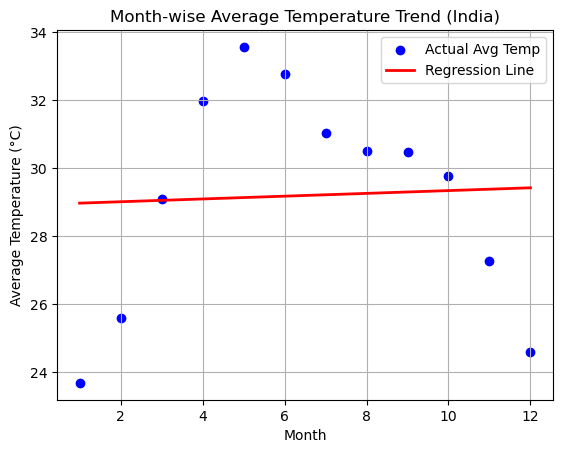

In [18]:
plt.scatter(X, y, color='blue', label='Actual Avg Temp')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Month-wise Average Temperature Trend (India)")
plt.legend()
plt.grid(True)
plt.show()